# **Blinkit Customer Churn Analysis**

# Team: HareNTortoise

---



# Problem Statement:
 To effectively reduce churn, Blinkit must analyze the underlying factors influencing
 customer behavior. This includes insights from market research into the quick-commerce
 model and, optionally, an analysis of the Churn Dataset (Link). The objective is to identify
 key drivers of churn and develop actionable strategies to enhance customer retention and
 satisfaction.



---



**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Importing Dataset**

In [2]:
import pandas as pd
file_path = '/SS2025Dataset.csv.csv'

# Load the dataset
data = pd.read_csv(file_path)

**Displaying and Describing Data from Dataset**

In [3]:
# Display the first few rows
print(data.head())

# Check data types and null values
print(data.info())


   UserID  CustomerAge     Sex  Tenure  ServiceUsageRate  SupportCalls  \
0       1           55    Male      20                24             4   
1       2           28    Male      27                30             4   
2       3           65  Female      60                17             7   
3       4           53    Male      47                16             8   
4       5           32    Male      56                 5             7   

   BillingDelay  PlanType AgreementDuration  TotalExpenditure  RecentActivity  \
0             6  Standard           Monthly               635              25   
1             5   Premium         Quarterly               631              10   
2            16   Premium         Quarterly               314               1   
3             7   Premium            Annual               527              13   
4            15   Premium            Annual               236              25   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      0  
<c

In [4]:
print(data.describe())


             UserID   CustomerAge        Tenure  ServiceUsageRate  \
count  16093.000000  16093.000000  16093.000000      16093.000000   
mean    8047.000000     42.028211     32.110669         15.092835   
std     4645.793276     13.852220     17.090305          8.823191   
min        1.000000     18.000000      1.000000          1.000000   
25%     4024.000000     30.000000     18.000000          7.000000   
50%     8047.000000     42.000000     33.000000         15.000000   
75%    12070.000000     54.000000     47.000000         23.000000   
max    16093.000000     65.000000     60.000000         30.000000   

       SupportCalls  BillingDelay  TotalExpenditure  RecentActivity  \
count  16093.000000  16093.000000      16093.000000    16093.000000   
mean       5.399615     17.073137        542.270863       15.533462   
std        3.118676      8.828506        261.841912        8.668119   
min        0.000000      0.000000        100.000000        1.000000   
25%        3.000000    

**Handle Missing Values**

In [5]:
print(data.isnull().sum())


UserID               0
CustomerAge          0
Sex                  0
Tenure               0
ServiceUsageRate     0
SupportCalls         0
BillingDelay         0
PlanType             0
AgreementDuration    0
TotalExpenditure     0
RecentActivity       0
Churn                0
dtype: int64


**Summary Statistics for Numerical Variables**

In [6]:
print("Median for Numerical Variables:")
print(data.median(numeric_only=True))

print("Mode for Numerical Variables:")
print(data.mode().iloc[0])


Median for Numerical Variables:
UserID              8047.0
CustomerAge           42.0
Tenure                33.0
ServiceUsageRate      15.0
SupportCalls           6.0
BillingDelay          18.0
TotalExpenditure     534.0
RecentActivity        16.0
Churn                  0.0
dtype: float64
Mode for Numerical Variables:
UserID                     1
CustomerAge             63.0
Sex                   Female
Tenure                  29.0
ServiceUsageRate         2.0
SupportCalls            10.0
BillingDelay            21.0
PlanType             Premium
AgreementDuration    Monthly
TotalExpenditure       736.0
RecentActivity          29.0
Churn                    0.0
Name: 0, dtype: object


**Analyze Categorical Variables**

In [7]:
# Distribution of categorical variables
categorical_columns = ['PlanType', 'AgreementDuration']
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())


Value Counts for PlanType:
PlanType
Premium     5402
Standard    5356
Basic       5335
Name: count, dtype: int64

Value Counts for AgreementDuration:
AgreementDuration
Monthly      5456
Quarterly    5401
Annual       5236
Name: count, dtype: int64


**Visualize Trends**

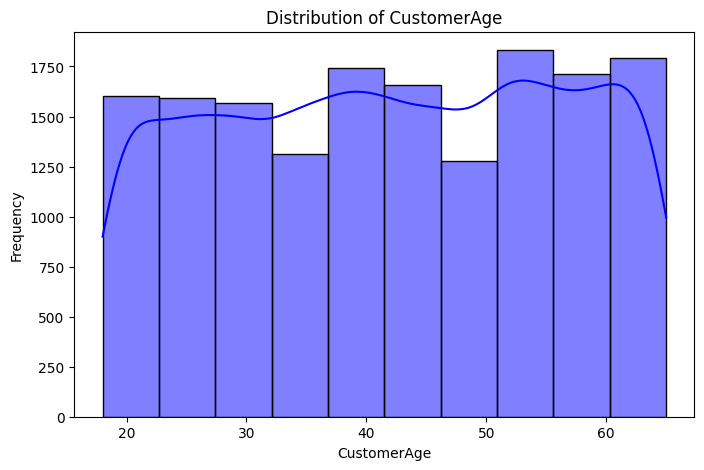

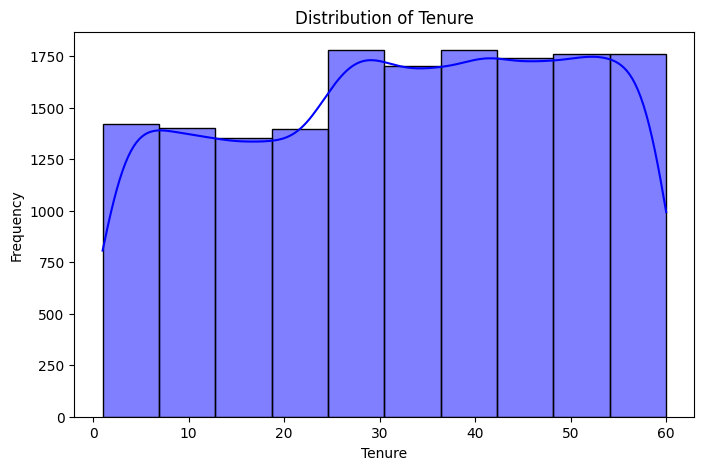

In [ ]:
# Histogram for CustomerAge and Tenure
numerical_columns = ['CustomerAge', 'Tenure']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=10, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
data['CustomerAge'].value_counts()

,count
CustomerAge,
63,388
61,377
53,377
51,376
55,375
52,373
42,361
39,361
38,361


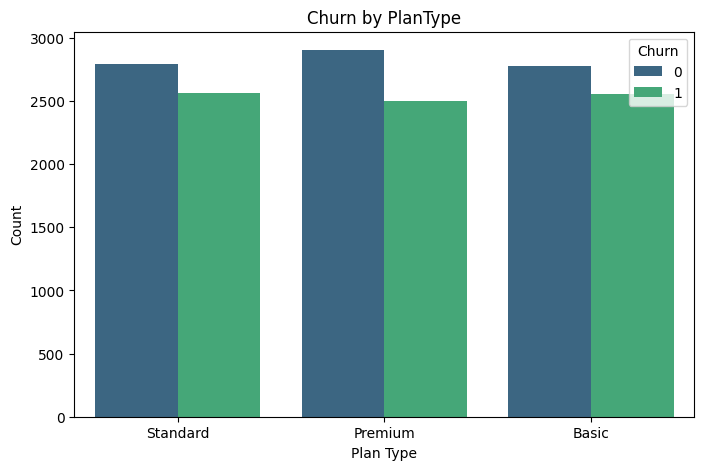

In [ ]:
# Bar chart for Churn by PlanType
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='PlanType', hue='Churn', palette='viridis')
plt.xlabel("Plan Type")
plt.ylabel("Count")
plt.legend(title="Churn", loc='upper right')
plt.show()

This graph clearly show that churn rates of premium customers are more that of standard and basics

In [ ]:
# Overall churn rate
total_customers = len(data)
churned_customers = data[data['Churn'] == 1]
overall_churn_rate = len(churned_customers) / total_customers
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")




Overall Churn Rate: 47.35%


In [ ]:
# Churn rate by PlanType
churn_by_plan = data.groupby('PlanType')['Churn'].mean()
print("Churn Rate by Plan Type:")
print((churn_by_plan)*100)



Churn Rate by Plan Type:
PlanType
Basic       47.891284
Premium     46.260644
Standard    47.908887
Name: Churn, dtype: float64


In [ ]:
# Churn rate by AgreementDuration
churn_by_agreement = data.groupby('AgreementDuration')['Churn'].mean()
print("Churn Rate by Agreement Duration:")
print((churn_by_agreement)*100)



Churn Rate by Agreement Duration:
AgreementDuration
Annual       46.734148
Monthly      51.228006
Quarterly    44.028884
Name: Churn, dtype: float64


In [9]:
# Churn rate by Age Group
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
churn_by_age_group = data.groupby('AgeGroup',observed=False)['Churn'].mean()
print("Churn Rate by Age Group:")
print((churn_by_age_group)*100)


Churn Rate by Age Group:
AgeGroup
18-30    44.725303
31-40    44.087326
41-50    43.816469
51-60    53.258110
60+      54.489682
Name: Churn, dtype: float64


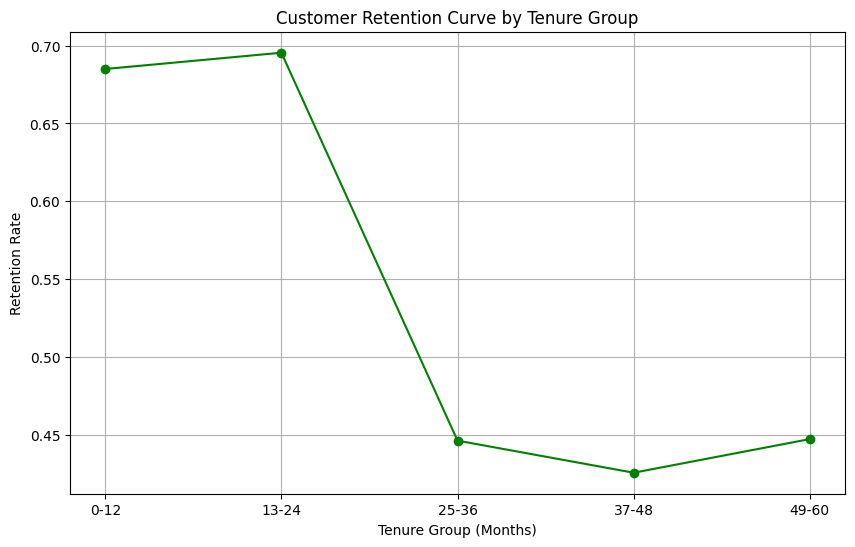

In [10]:
# Create cohorts based on Tenure
data['TenureGroup'] = pd.cut(data['Tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61+'])

# Group by TenureGroup and Churn to calculate retention rates
cohort_tenure = data.groupby(['TenureGroup', 'Churn'] , observed=False).size().unstack(fill_value=0)
cohort_tenure['RetentionRate'] = cohort_tenure[0] / (cohort_tenure[0] + cohort_tenure[1])

# Visualize retention curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cohort_tenure.index.astype(str), cohort_tenure['RetentionRate'], marker='o', color='green')
plt.title("Customer Retention Curve by Tenure Group")
plt.xlabel("Tenure Group (Months)")
plt.ylabel("Retention Rate")
plt.grid()
plt.show()



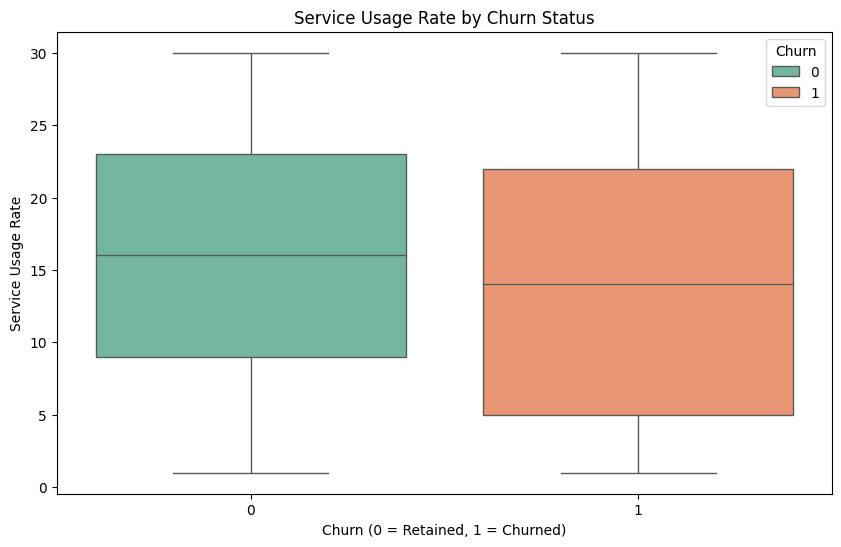

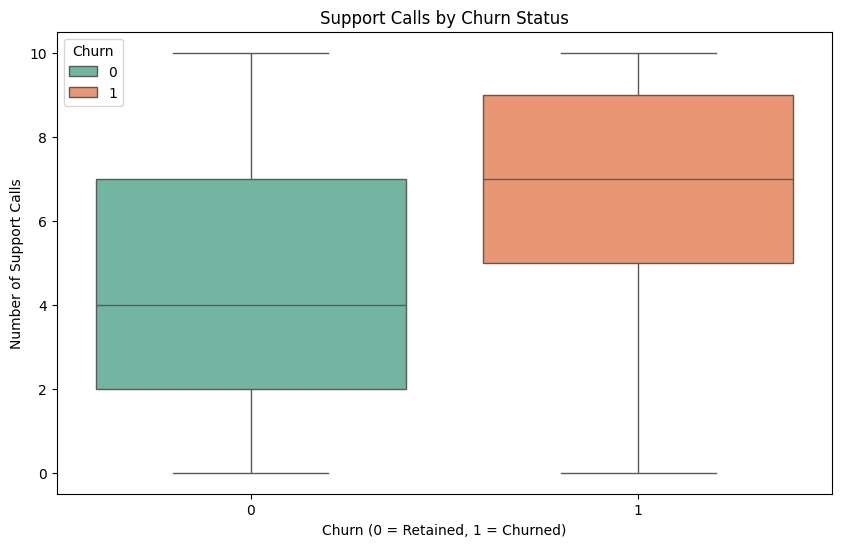

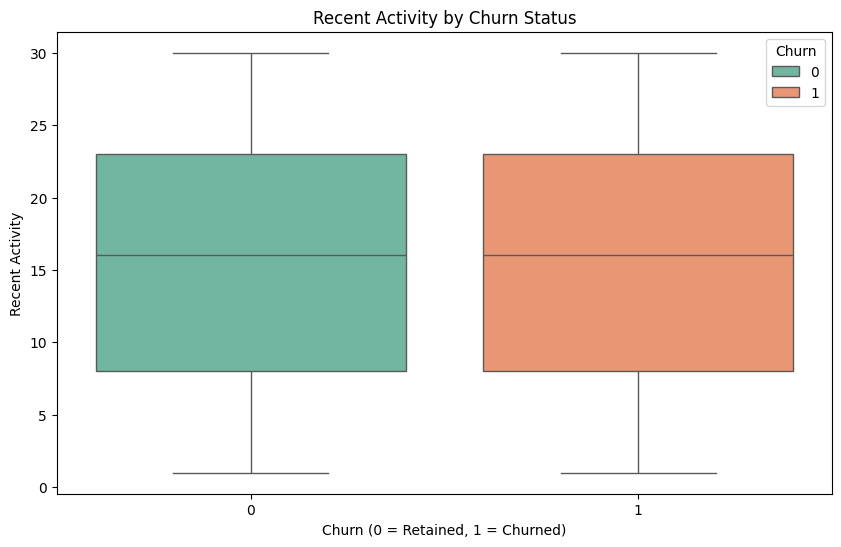

In [12]:
import seaborn as sns

# Compare ServiceUsageRate for churned vs. retained customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='ServiceUsageRate', data=data,hue='Churn', palette="Set2")
plt.title("Service Usage Rate by Churn Status")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Service Usage Rate")
plt.show()

# Compare SupportCalls for churned vs. retained customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='SupportCalls', data=data, hue='Churn',palette="Set2")
plt.title("Support Calls by Churn Status")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Support Calls")
plt.show()

# Compare RecentActivity for churned vs. retained customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='RecentActivity', data=data,hue='Churn', palette="Set2")
plt.title("Recent Activity by Churn Status")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Recent Activity")
plt.show()


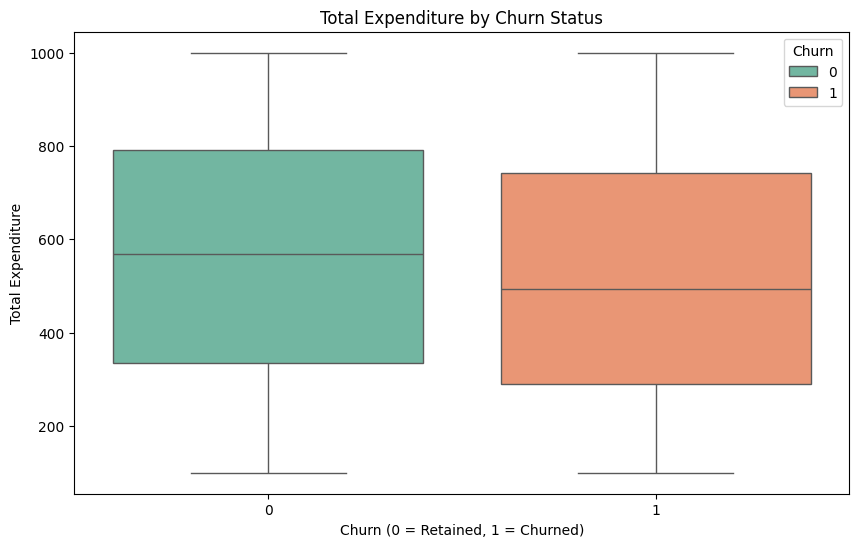

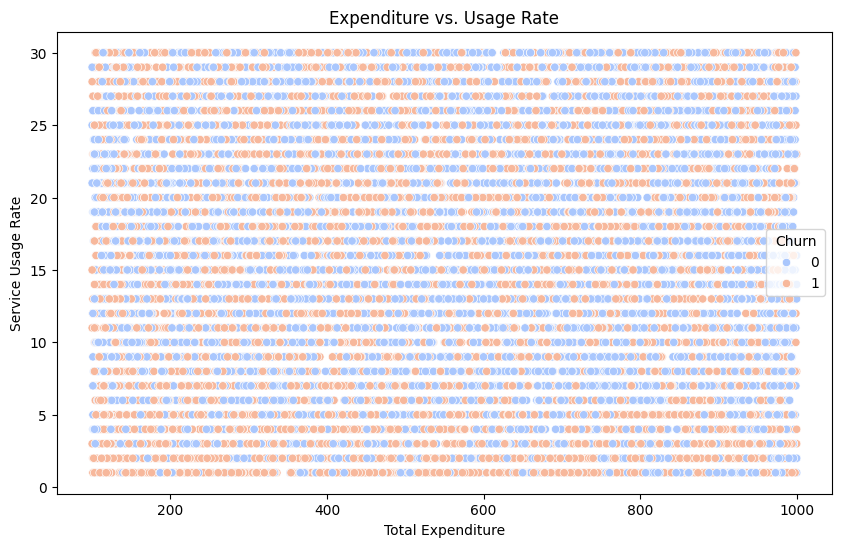

In [13]:
# Compare TotalExpenditure for churned vs. retained customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalExpenditure', data=data,hue='Churn', palette="Set2")
plt.title("Total Expenditure by Churn Status")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Total Expenditure")
plt.show()

# Scatterplot: TotalExpenditure vs. ServiceUsageRate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalExpenditure', y='ServiceUsageRate', hue='Churn', data=data, palette="coolwarm")
plt.title("Expenditure vs. Usage Rate")
plt.xlabel("Total Expenditure")
plt.ylabel("Service Usage Rate")
plt.show()


Churn Rate by Plan Type and Agreement Duration:
PlanType  AgreementDuration
Basic     Annual               48.060220
          Monthly              50.995575
          Quarterly            44.611111
Premium   Annual               45.609065
          Monthly              50.380849
          Quarterly            42.690384
Standard  Annual               46.559633
          Monthly              52.320442
          Quarterly            44.783574
Name: Churn, dtype: float64


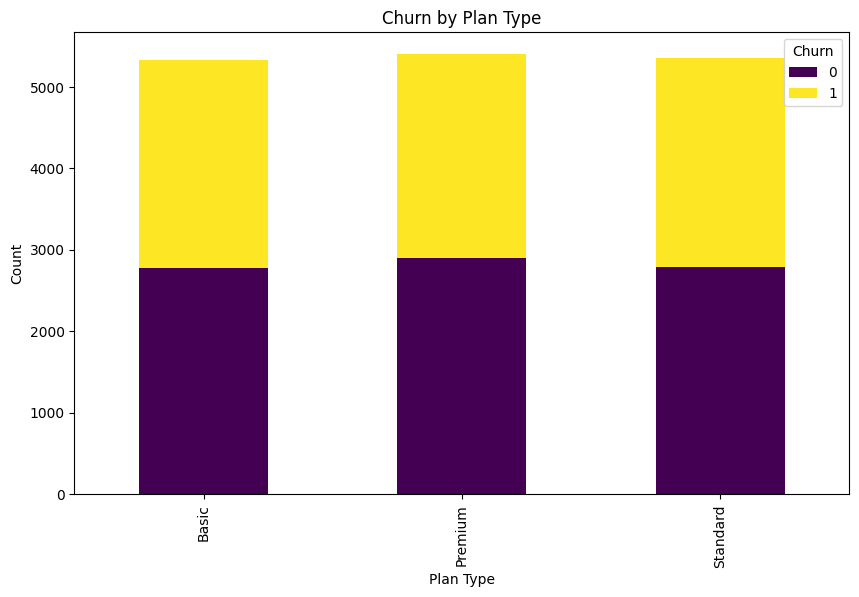

In [ ]:
# Churn rate by PlanType and AgreementDuration
churn_by_plan_agreement = data.groupby(['PlanType', 'AgreementDuration'])['Churn'].mean()
print("Churn Rate by Plan Type and Agreement Duration:")
print((churn_by_plan_agreement)*100)

# Stacked bar chart for PlanType and Churn
plan_churn = data.groupby(['PlanType', 'Churn']).size().unstack()
plan_churn.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Churn by Plan Type")
plt.xlabel("Plan Type")
plt.ylabel("Count")
plt.show()
